In [ ]:
'''Do people who grow up in big families have big families?  
Do people who grow up in small families have small families?  
Does growing up in a big family impact the likelihood of spanking being okay?
Have the answers to these questions changed in the past 20 years?'''

In [176]:
import sys
sys.path.append("C:/Users/Maisha/Dropbox/MB_dev/Python/python_gss")

from csv_to_dataframe import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataf = get_gss()

''' this array is true wherever sibs < 98'''
bool_array = dataf['sibs'] < 98

'''this array contains just those rows of dataf where sibs<98'''
'''smallsibs1 is shorter than dataf'''
smallsibs1 = dataf[bool_array]

'''this array is the same size as smallsibs, and contains true wherever sibs>0'''
bool2 = smallsibs1['sibs'] >= 0

'''this array contains just those rows of smallsibs1 where sibs>0'''
'''smallsibs1 is shorter than dataf'''
smallsibs2 = smallsibs1[bool2]

str_maker = lambda x : str(x)+"stringy"

dataf['sibs'].apply(str_maker) 


0         4stringy
1         4stringy
2         2stringy
3         6stringy
4         3stringy
5         3stringy
6         5stringy
7         8stringy
8         2stringy
9         5stringy
10       99stringy
11        1stringy
12        4stringy
13        1stringy
14        4stringy
15        2stringy
16        0stringy
17        0stringy
18        2stringy
19        2stringy
20        3stringy
21        2stringy
22        1stringy
23        1stringy
24        4stringy
25        7stringy
26       12stringy
27        6stringy
28        3stringy
29        7stringy
           ...    
33048     2stringy
33049     1stringy
33050     3stringy
33051     2stringy
33052     5stringy
33053     2stringy
33054     1stringy
33055     2stringy
33056     2stringy
33057     2stringy
33058     3stringy
33059     3stringy
33060     2stringy
33061     1stringy
33062     2stringy
33063     5stringy
33064     2stringy
33065     5stringy
33066     1stringy
33067     1stringy
33068     1stringy
33069     7s

In [43]:
'''Across all years (taken all together) what was the 
numeric average number of siblings (sibs) that a respondent had? 
'''

ct = len(smallsibs2['sibs'])
added = sum(smallsibs2['sibs'])
ave = added/ct
sd = np.std(smallsibs2['sibs'])
print("Average sibs = "+str(ave)+", standard dev = "+str(sd))

Average sibs = 3.71570184915, standard dev = 3.154925061379272


In [6]:
'''Across all years (taken all together) what was the numeric average number of children (childs) 
that a respondent had? '''
smallchilds = dataf[dataf['childs']<9]
ave = sum(smallchilds['childs'])/len(smallchilds['childs'])
sd = np.std(smallchilds['childs'])
print("Average childs = "+str(ave)+", standard dev = "+str(sd))

Average childs = 1.85162503032, standard dev = 1.674684284833455


In [7]:
'''In 1994, what was the numeric average number of siblings (sibs) that a respondent had? 
What was it in 2016?'''
x1 = dataf[dataf['sibs']<98]
x2 = x1[x1['sibs']>=0]
x94 = x2.query('year==1994')
x16 = x2.query('year==2016')
ave94 = sum(x94['sibs'])/len(x94['sibs'])
ave16 = sum(x16['sibs'])/len(x16['sibs'])
print(ave94, ave16)

3.71821536397 3.71837875611


In [8]:
'''What fraction of respodents were only children in 1994 versus 2016'''
bool_array = dataf['sibs']==0
x1zero = dataf[bool_array]

''' total number of respondents in 1994 who had no siblings'''
x94 = len(x1zero.query('year==1994'))

''' total number of respondents in 2016 who had no siblings'''
x16 = len(x1zero.query('year==2016'))

''' total number of respondents in 1994 who had siblings'''
all94 = len(dataf.query('year==1994 and sibs>=0 and sibs<98'))

''' total number of respondents in 2016 who had siblings'''
all16 = len(dataf.query('year==2016 and sibs>=0 and sibs<98'))

# percentages

perc94 = x94/all94
perc16 = x16/all16
print(perc94, perc16)

0.05434417980543442 0.045422781271837874


In [55]:
'''In 1994, what was the numeric average number of children (childs) that a respondent had? What was it in 2016?'''
def children(y1, y2):
    x1 = dataf[dataf['childs']<9]
    x2 = x1[x1['childs']>=0]
    # people who responded in 94,16
    x94 = x2.query('year=={}'.format(y1))
    x16 = x2.query('year=={}'.format(y2))
    # ave numbe of children per respondent in 94,16
    ave94 = sum(x94['childs'])/len(x94['childs'])
    ave16 = sum(x16['childs'])/len(x16['childs'])
    print(ave94, ave16)
    
children(1994,2016)

1.8588669125 1.85204616999


In [141]:
# color map 
colors = {1:'red', 2:'orange', 3:'turquoise', 4:'blue', 8:'white', 9:'white', 0:'white'}

# convert spanking variable to color
sp_color = dataf['spanking'].apply(lambda x : colors[x])
sp_color


# make a numpy array w 2 columns and 30 rows filled with random numbers
rdata = np.random.uniform(-100, 100, (30,2))


In [142]:
cols = np.array(['x axis', 'y axis'])

# convert to pandas and gave the columns labels
rdata_df = pd.DataFrame(data=rdata[0:,0:],#,    # values
             columns=cols)

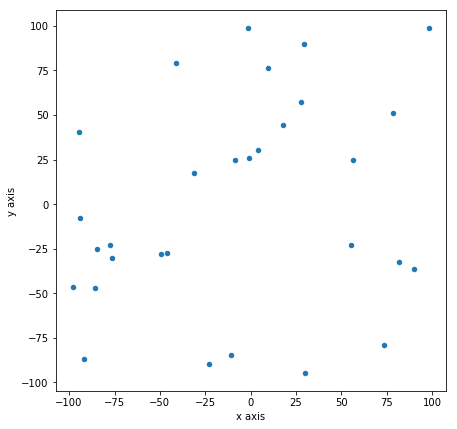

In [143]:
# made a scatter plot
rdata_df.plot(kind='scatter', x=0, y=1, figsize=(7,7))





In [ ]:

# made a numpy zero array
x = np.zeros(shape=(6,6))

# poke values into it
x[1][1]=888
x[0][1]=9

x[1][5]=-45
x[5][1]=-23
print(x)


# extract regions by [A,B] where A is a list of 
# rows and B is a list of columns (and : can be used to write the list)

print(x[1:3,1:2])

print(x[[1,5]])


In [71]:
dfcs = dataf.query('childs<9 and 0<=sibs<8')
dfcs[['sibs','childs']].shape

(28083, 2)

Axes(0.125,0.125;0.775x0.755) Axes(0.125,0.125;0.775x0.755)


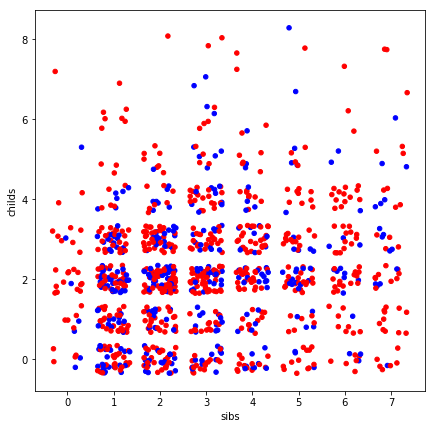

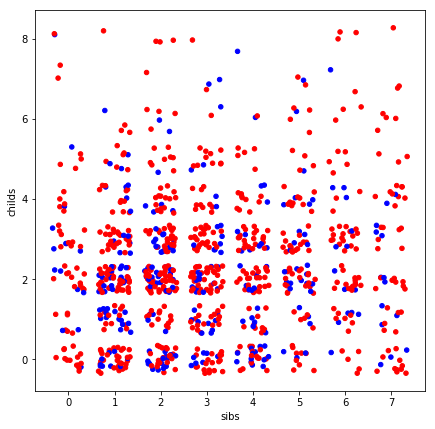

In [10]:
'''Make a scatter plot in which the X axis is the number 
of children (childs), and the Y axis is the number of 
siblings (sibs).  There will be 30,000+ points on this graph.  
Visually, does it seem like there is a relationship?'''

# data for valid children & sibs answer
dfcs = dataf.query('childs<9 and 0<=sibs<8')

# make plot for year and min age 
def make_plot(yr, ag):
    sql = 'childs<9 and 0<=sibs<8 and year=={} and age>{} and 0<spanking<8'.format(yr, ag)
    dfcs = dataf.query( sql )
    
    noise_table = np.random.uniform(-0.35, 0.35, (dfcs[['sibs','childs']].shape))
    
    dfcsnoisy = dfcs[['sibs','childs']] + noise_table
    
    colors = {'1':'red', '2':'red', '3':'blue', '4':'blue'}
    sp_color = dfcs['spanking'].apply(lambda x : colors[str(x)])
    
    #print(sp_color)
    the_plot = dfcsnoisy.plot(kind='scatter', x='sibs', y='childs', figsize=(7,7), c=sp_color)
    return the_plot

yr16 = make_plot(2016, 39)
yr94 = make_plot(1994, 39)

print(yr94, yr16)

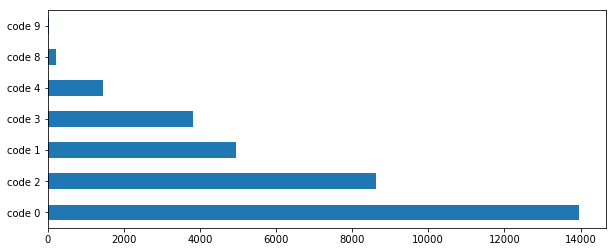

In [179]:
# extract data series (2 columns: id, spanking)
sp_data = dataf['spanking']
# transform the spanking column
sp_data_transformed = sp_data.apply(lambda x : "code "+str(x))
# caluculate counts -> series (2 columns: spanking value, count -- like a SQL count/group by)
sp_counts = sp_data_transformed.value_counts()
# horizontal bar graph
sp_counts[:10].plot(kind='barh', rot=0, figsize=(10, 4))

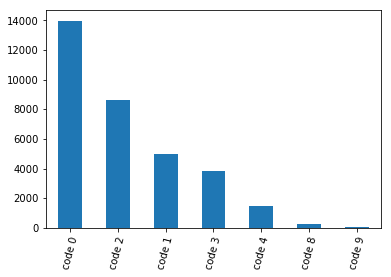

In [180]:
sp_counts[:10].plot(kind='bar', rot=75)

In [182]:
by_sibs_childs = dataf.groupby(['sibs', 'childs'])
by_sibs_childs.size()

sibs  childs
-1    0          386
      1          248
      2          384
      3          261
      4          131
      5           44
      6           29
      7           16
      8           13
      9            6
 0    0          544
      1          231
      2          340
      3          194
      4           97
      5           33
      6           12
      7            9
      8           19
      9            3
 1    0         2149
      1          983
      2         1488
      3          722
      4          282
      5          102
      6           52
      7           15
      8           19
      9           18
                ... 
 29   3            1
 30   0            2
      4            1
      7            1
 31   0            1
      2            2
      4            1
      6            1
 32   4            2
 33   2            1
      3            1
 34   3            1
 35   3            1
 37   5            1
 43   0            1
 55   2            1


In [183]:
by_sibs_childs.size().unstack()

childs,0,1,2,3,4,5,6,7,8,9
sibs,,,,,,,,,,
-1,386.0,248.0,384.0,261.0,131.0,44.0,29.0,16.0,13.0,6.0
0,544.0,231.0,340.0,194.0,97.0,33.0,12.0,9.0,19.0,3.0
1,2149.0,983.0,1488.0,722.0,282.0,102.0,52.0,15.0,19.0,18.0
2,2071.0,1020.0,1709.0,925.0,367.0,123.0,52.0,27.0,32.0,10.0
3,1442.0,881.0,1373.0,814.0,366.0,149.0,63.0,33.0,28.0,11.0
4,920.0,596.0,984.0,601.0,309.0,128.0,57.0,27.0,29.0,10.0
5,517.0,371.0,676.0,456.0,229.0,102.0,49.0,28.0,22.0,4.0
6,354.0,289.0,489.0,332.0,194.0,76.0,43.0,19.0,29.0,3.0
7,264.0,236.0,357.0,217.0,158.0,72.0,39.0,25.0,23.0,6.0


In [187]:
crosstab = by_sibs_childs.size().unstack().fillna(0)
crosstab

childs,0,1,2,3,4,5,6,7,8,9
sibs,,,,,,,,,,
-1,386.0,248.0,384.0,261.0,131.0,44.0,29.0,16.0,13.0,6.0
0,544.0,231.0,340.0,194.0,97.0,33.0,12.0,9.0,19.0,3.0
1,2149.0,983.0,1488.0,722.0,282.0,102.0,52.0,15.0,19.0,18.0
2,2071.0,1020.0,1709.0,925.0,367.0,123.0,52.0,27.0,32.0,10.0
3,1442.0,881.0,1373.0,814.0,366.0,149.0,63.0,33.0,28.0,11.0
4,920.0,596.0,984.0,601.0,309.0,128.0,57.0,27.0,29.0,10.0
5,517.0,371.0,676.0,456.0,229.0,102.0,49.0,28.0,22.0,4.0
6,354.0,289.0,489.0,332.0,194.0,76.0,43.0,19.0,29.0,3.0
7,264.0,236.0,357.0,217.0,158.0,72.0,39.0,25.0,23.0,6.0


In [188]:
crosstab.sum(0)

childs
0    9159.0
1    5334.0
2    8573.0
3    5240.0
4    2532.0
5    1041.0
6     517.0
7     265.0
8     323.0
9      94.0
dtype: float64

In [190]:
type(crosstab.sum(0))

pandas.core.series.Series

In [189]:
crosstab.sum(1)

sibs
-1     1518.0
 0     1482.0
 1     5830.0
 2     6336.0
 3     5160.0
 4     3661.0
 5     2454.0
 6     1828.0
 7     1397.0
 8      959.0
 9      678.0
 10     469.0
 11     387.0
 12     247.0
 13     167.0
 14     106.0
 15      74.0
 16      57.0
 17      29.0
 18      24.0
 19      11.0
 20      15.0
 21      45.0
 22      12.0
 23      12.0
 24       3.0
 25       6.0
 26       1.0
 27       3.0
 28       1.0
 29       2.0
 30       4.0
 31       5.0
 32       2.0
 33       2.0
 34       1.0
 35       1.0
 37       1.0
 43       1.0
 55       1.0
 98      28.0
 99      58.0
dtype: float64

In [146]:
'''Is there a correlation between number of siblings and number of children?'''
# we gave it two columns
#corrcoeff returns a matrix (diagonal entries are variable corr w itself so always 1)
np.corrcoef(dataf['sibs'], dataf['childs'])

# just return the off diagonal entry
np.corrcoef(dataf['sibs'], dataf['childs'])[0][1]


0.1220870740896727

In [148]:
# a var is always perfectly corr w itself
x1 = np.corrcoef(dataf['sibs'], dataf['sibs'])
print("with itself: "+str(x1[0][1]))

with itself: 1.0


In [156]:
# if there is noise then the corr becomes < 1
noise1 = np.random.uniform(-20, 20, (dataf['sibs'].shape))
noise1
sibs2 = dataf['sibs'] + noise1
sibs2
np.corrcoef(dataf['sibs'], sibs2)

array([[ 1.       ,  0.4551166],
       [ 0.4551166,  1.       ]])

In [159]:
# always perfect -1 corr with negation
inv = dataf['sibs'] * -1
np.corrcoef(dataf['sibs'], inv)

array([[ 1., -1.],
       [-1.,  1.]])

In [169]:
# what if we did our correlation calculations after re-binning
# the variables to make them -1 or 1
truncate_sibs = lambda y: lambda x: -1 if x<y else +0 if x>=98 else 1
testfunc = truncate_sibs(5)
print(testfunc(2))
print(testfunc(7))
print(testfunc(140))

-1
1
0


In [173]:
# what if we did our correlation calculations after re-binning
# the variables to make them -1 or 1
truncate_sibs = lambda y: lambda x: -1 if x<y else 0 if x>=98 else 1
truncate_childs = lambda y: lambda x: -1 if x<y else 0 if x>=9 else 1

#truncate_sibs(5) is a function of one argument (x) since y=5 is bound
# st has the same shape as dataf['sibs']

st = dataf['sibs'].apply(truncate_sibs(2))
ct = dataf['childs'].apply(truncate_childs(2))
np.corrcoef(st, ct)[0][1]

0.093600171940518534

In [174]:
# here we try and find the best thresholds
cutoffs_childs = list(range(9))
cutoffs_sibs = list(range(9))
corr_array = []
bestcorr = 0.0
bestc = -1
bests = -1
for c in cutoffs_childs:
    for s in cutoffs_sibs:
        st = dataf['sibs'].apply(truncate_sibs(s))
        ct = dataf['childs'].apply(truncate_childs(c))
        corr = np.corrcoef(st, ct)[0][1]
        corr_array.append( [s, c, corr] )
        if corr>bestcorr:
            bestcorr = corr
            bestc = c
            bests = s
print(bests, bestc, bestcorr)

5 3 0.151232848902
